# **Green Screening `Images` and `Videos` with `OpenCV`**

> `Green screening` is a technique that allows you to place any `background picture` you want behind the performers or the foreground. A green screen is a large `green backdrop` placed in the background of a shot to allow for digital effects later.

* Here we will use python Computer Vision library `OpenCV (cv2)` to perform green screen using -

1. **`Image`** as both `Foreground` and `Background`
2. **`Video`** as both `Foreground` and `Background` (with more than one consecutive backgrounds)

![Image](https://i.ytimg.com/vi/JfyzwWgZT4M/maxresdefault.jpg)

'''

### **Thought Process**

* The `first` step is to capture the image or video using a `green screen as it's background`.
* The `second` step is to capture the image or video that we wish to `use as the background`.
* The `third` step is to `replace the green background` with the desired background image or video.

'''

* [Understanding with Code](#1)
* [Green Screening a Video with Multiple Consecutive Video Backgrounds](#2)

***
***

## **Understanding with Code** <a id="1"></a>

* First, we will perform green screen using `Image as both Foreground and Background`.

'''

#### **Code Summary**

* We will `remove the green screen` from the foreground image, 
* `Remove the pixels` from the `background image` where the foreground part will be present, 
* Then `add both images`.

'''

#### **Importing Libraries**

* We will import `3` libraries -

**1.** `cv2` - `OpenCV` is an open-source computer vision library that can be used for various `image and video processing tasks`, including green screening. It provides several functions for `image processing`, such as color space conversion, thresholding, and filtering. You can use OpenCV to `remove the green background` from your footage and replace it with the desired background image or video.

**2.** `numpy` - `NumPy` is a Python library that provides support for `large, multi-dimensional arrays and matrices`. NumPy can be used in `conjunction with OpenCV` for image processing tasks like `green screening`.

**3.** `plt` - `Pyplot` is a module in the Matplotlib library that provides a convenient interface for `creating plots and charts` in Python.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

#### **Importing Foreground and Background Images**

* We will first read the foreground image, `resize it to 1920x1080p` (we resize both images to the same size) and then display it.

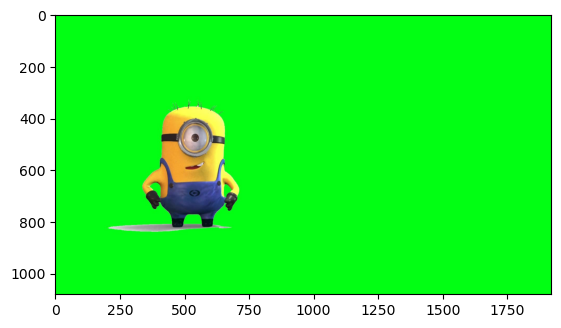

In [2]:
# Importing Image
foreground_image = cv2.imread("green_screen_image.jpg")

# Resize the image
foreground_image = cv2.resize(foreground_image, (1920,1080))

# Display the Image
plt.imshow(cv2.cvtColor(foreground_image, cv2.COLOR_BGR2RGB))
plt.show()

* We do the same with the background image.

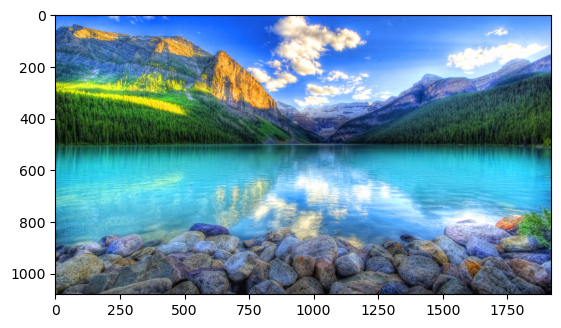

In [3]:
# Importing Image
background_image = cv2.imread("backgrounds_scenery.jpg")

# Resize the image
background_image = cv2.resize(background_image, (1920,1080))

# Display the Image
plt.imshow(cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB))
plt.show()

#### **Convert green screen image to HSV color space**

* The `HSV color space (hue, saturation, value)` is often used for `selecting colors` from a color wheel or palette, because it corresponds better to how people experience color than the RGB color space does. The functions rgb2hsv() and hsv2rgb() convert images between the RGB and HSV color spaces.

* Here, we will `convert` green screen image to `HSV color space`.

In [4]:
hsv = cv2.cvtColor(foreground_image, cv2.COLOR_BGR2HSV)

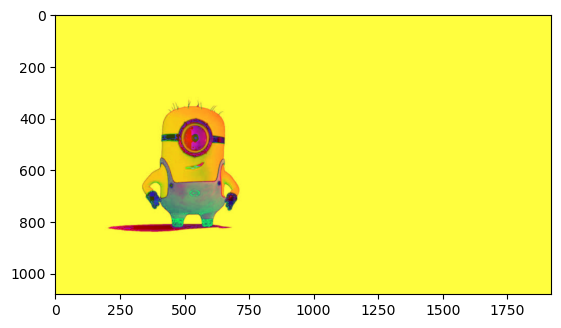

In [5]:
plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_BGR2RGB))
plt.show()

#### **Load the upper and lower BGR values of the green color**

* We will use this to `differentiate` between the `foreground` and the `green screen background`.

In [6]:
# Upper Green BGR value
upper_green = np.array([80, 255, 255])

# Lower Green BGR value
lower_green = np.array([40, 50, 50])

#### **Create mask by thresholding green screen image**

* `cv2.inRange()` is an `OpenCV` function that is used to `threshold an image`. It expects `three arguments`: the first is the `image` where we are going to perform color detection, the second is the `lower limit` of the `color` you want to detect, and the third argument is the `upper limit` of the color you want to detect.

> `Image thresholding` is a simple form of `image segmentation`. It is a way to create a `binary image` from a grayscale or full-color image. This is typically done in order to `separate “object”` or foreground pixels from background pixels to aid in image processing.

In [7]:
mask = cv2.inRange(hsv, lower_green, upper_green)

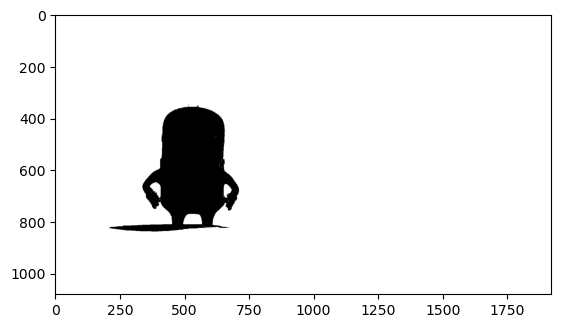

In [8]:
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()

`Note - The pixels turned "off" are black in color.`

#### **Invert mask**

* `cv2.bitwise_not()` is an `OpenCV` function that is used to `invert` the “on” and “off” pixels in an image.
* `Inverting a mask` basically inverts the whole process, that is, the pixels in the highlighted portion become 0 and all other pixels remain non-zero. 

In [9]:
mask_inv = cv2.bitwise_not(mask)

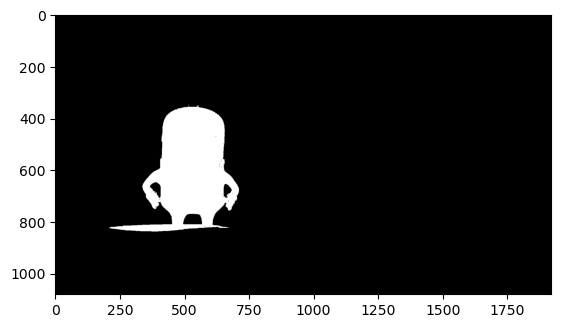

In [10]:
plt.imshow(cv2.cvtColor(mask_inv, cv2.COLOR_BGR2RGB))
plt.show()

#### **Apply mask to replacement image**

* `cv2.bitwise_and()` is an `OpenCV` function that is used to perform `bitwise AND` operation on two images.

> The `bitwise AND` operation between `two images` is performed on the `binary representation` of these pixel values of corresponding images. The function calculates the `conjunction of pixels` in both images. This operation only considers pixels that are common with image 1 and image 2 and remaining pixels are removed from the output image.

* This will `remove` the pixels from `background image` where f`oreground image` (without green screen) will be added.

In [11]:
replacement_masked = cv2.bitwise_and(background_image, background_image, mask=mask)

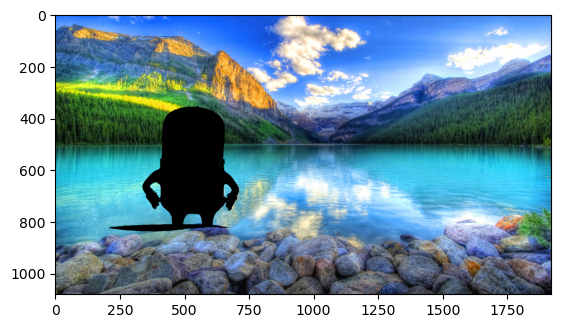

In [12]:
plt.imshow(cv2.cvtColor(replacement_masked, cv2.COLOR_BGR2RGB))
plt.show()

#### **Apply inverted mask to green screen image**

* We will use `cv2.bitwise_and()` to apply the `inverted mask` on the green screen image to only keep the required part and remove the green screen.

In [13]:
green_screen_masked = cv2.bitwise_and(foreground_image, foreground_image, mask=mask_inv)

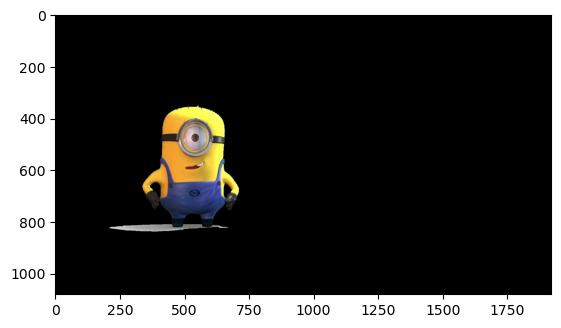

In [14]:
plt.imshow(cv2.cvtColor(green_screen_masked, cv2.COLOR_BGR2RGB))
plt.show()

#### **Add two images together**

* Finally, we will add the `masked green screen` image and the cut-out `background image`.

In [15]:
result = cv2.add(green_screen_masked, replacement_masked)

#### **Display Image**

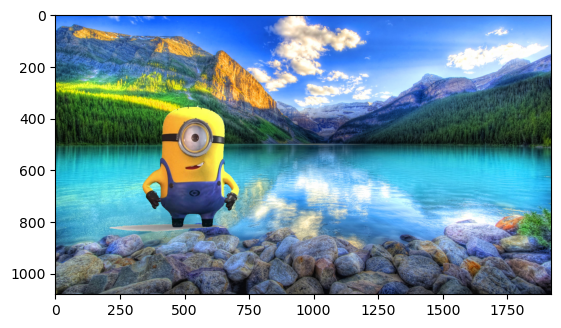

In [16]:
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

* Pick 7 videos
* Take 4 sec bits out of each and sew them together to make them one video as long as green screen
* Use it as the background


***
***

## **Green Screening a Video with Multiple Consecutive Video Backgrounds** <a id="2"></a>

* Here, we will replace the green screen in a `video` with multiple consecutive background videos.

### **`Note`**

> [All Videos](https://drive.google.com/drive/folders/1gWwiQvf3at2p7T4cCaXo9qVFRNJp4W-z?usp=drive_link) including the [final_result.mp4](https://drive.google.com/file/d/1asJjjEDzfhxV2H2VuT3qrfB6Gc59_PK_/view?usp=drive_link) can be accessed in `Google Drive`.


'''

#### **Code Summary**

* Import and `Resize` background videos to one size.
* `Cut out small bits` from each video and `sew` them together into one video.
* Use this video as the background in the `green screen` video.

'''

#### **Importing Libraries**

* Same as before we import `OpenCV`, `Numpy` and `Pyplot`.

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### **Specifying Video Path**

* We will `specify paths` for our `Green Screen` video and all of our `background` videos.

In [18]:
green_screen = "0_green_screen.mp4"


background_nature = "1_nature.mp4"
background_village = "2_village.mp4"
background_factory = "3_factory.mp4"
background_underwater = "4_underwater.mp4"
background_military = "5_military.mp4"
background_protest = "6_protest.mp4"
background_space = "7_space.mp4"

* Let's also make a `list` of all the `background videos` to make it easier to work on them.

In [19]:
background_video_list = [background_nature, background_village, background_factory, background_underwater,
                         background_military, background_protest, background_space]

#### **Resize the videos to 1080p**

* We will `resize` all our videos to `1920x1080`.
* `Resizing` will ensure no errors, good video quality and compatibility with each other.

In [20]:
video_size = (1920,1080)

* Below is the entire process of `Resizing` and then `writing` the resized video into another file.

In [21]:
# Selecting a video
video = green_screen

# Reading the video
cap = cv2.VideoCapture(video)

# Get the fps of the video 
fps = cap.get(cv2.CAP_PROP_FPS)

# Set the codec of the output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Method to write the video onto a new file
out = cv2.VideoWriter(video, fourcc, fps, video_size)

# Using this while loop we will resize each frame of the video and it into a file
while True:
    ret, frame = cap.read()
    if ret == True:
        frame = cv2.resize(frame, video_size)
        out.write(frame)
    else:
        break

# Get the resolution of the resultant video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(width,height)

# Free up the resources by releasing the stored video
cap.release()
out.release()

1920 1080


* Now we will `resize` all of our `background` videos

In [22]:
for video in background_video_list:
    cap = cv2.VideoCapture(video)
    fps = cap.get(cv2.CAP_PROP_FPS)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(video, fourcc, fps, video_size)
    
    while True:
        ret, frame = cap.read()
        if ret == True:
            frame = cv2.resize(frame, video_size)
            out.write(frame)
        else:
            break
        
    cap.release()
    out.release()

#### **Slicing the videos and creating one Background video**

* Now we will `save 4 sec` of each video and `sew` them together.

**Code for Slicing a video**

In [23]:
# These four lines below work the same as explained earlier
cap = cv2.VideoCapture(green_screen)
fps = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter("sliced_output.mp4", fourcc, fps, (1920, 1080))

frame_count = 0

# In this while loop we multiply the fps obtained above by 4 and write 
# one frame at a time in a new video while incrementing the frame_count 
# value by 1 until it is equal to fps*4.
while True:
    ret, frame = cap.read()
    if ret == True:
        if frame_count < fps * 4:
            out.write(frame)
            frame_count += 1
        else:
            break
    else:
        break

cap.release()
out.release()

**Here is the complete code to slice and save 4 sec clips from all background videos**

In [24]:
video_count = 1

for video in background_video_list:

    cap = cv2.VideoCapture(video)
    fps = cap.get(cv2.CAP_PROP_FPS)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter("background_"+str(video_count)+".mp4", fourcc, fps, (1920, 1080))
    video_count+=1

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if ret == True:
            if frame_count < fps * 4:
                out.write(frame)
                frame_count += 1
            else:
                break
        else:
            break
    
    

    cap.release()
    out.release()

**Sewing two videos together**

In [25]:
# Read the video needed to be joined
video1 = cv2.VideoCapture("sliced_ouput.mp4")
video2 = cv2.VideoCapture("1_nature.mp4")

# As explained above
fps = video1.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter("sewed_output.mp4", fourcc, fps, (1920, 1080))

# Using this loop we write the frames of the videos we read one by
# one into another file
while True:
    ret1, frame1 = video1.read()

    if ret1 == True:
        out.write(frame1)
    else:
        break

while True:
    ret2, frame2 = video2.read()

    if ret2 == True:
        out.write(frame2)
    else:
        break

video1.release()
video2.release()
out.release()

* Below is the `list` of all background videos that we will join.

In [26]:
videos = ["background_1.mp4", "background_2.mp4", "background_3.mp4", "background_4.mp4", 
          "background_5.mp4", "background_6.mp4", "background_7.mp4"]

**Here is the complete code to sew in all sliced background videos together**

In [27]:
# Create a VideoCapture object for each video
cap = [cv2.VideoCapture(video) for video in videos]

# Get the width and height of the first video
width = int(cap[0].get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap[0].get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create a VideoWriter object to write the output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter("background_video.mp4", fourcc, 30.0, (width, height))

# Loop through each frame of each video and write it to the output video
for i in range(len(videos)):
    while True:
        ret, frame = cap[i].read()
        if not ret:
            break
        out.write(frame)

# Release the VideoCapture objects and the VideoWriter object
for i in range(len(videos)):
    cap[i].release()
out.release()

#### **Adding Background to the Green Screen Video**

* Now we will finally `add` the newly created `Background video` to the `Green screen video` with the same principle we saw in the `Code Demonstration` before.

In [28]:
green_screen = cv2.VideoCapture("0_green_screen.mp4")
background = cv2.VideoCapture("background_video.mp4")

In [29]:
# Upper Green BGR value
upper_green = np.array([80, 255, 255])

# Lower Green BGR value
lower_green = np.array([40, 50, 50])

In [30]:
# Get the fps of the green screen video
fps = green_screen.get(cv2.CAP_PROP_FPS)

# Set the video codec
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# This is the method to write into a video
out = cv2.VideoWriter("final_result.mp4", fourcc, fps, (1920, 1080))

In [31]:
while True: 
    # Capture each frame of both videos
    ret1, frame1 = green_screen.read()
    ret2, frame2 = background.read()

    # If either video ends, break out of loop
    if not ret1 or not ret2:
        break

    # If both video display a frame in the same time, we apply this code 
    # to replace the green screen with the background
    if ret1==True and ret2==True:

        # Convert green Screen to hsv color space
        hsv = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)
        # Mask using the green bgr values
        mask = cv2.inRange(hsv, lower_green, upper_green)
        # Invert the mask
        mask_inv = cv2.bitwise_not(mask)
        # remove the pixels from the background frame where foreground image will
        # be present
        replacement_masked = cv2.bitwise_and(frame2, frame2, mask=mask)
        # Remove the green background from the green screen video frame
        green_screen_masked = cv2.bitwise_and(frame1, frame1, mask=mask_inv)
        # Add both frames
        result = cv2.add(green_screen_masked, replacement_masked)
        # Write the frame into the set file
        out.write(result)
    else: break 

green_screen.release()
background.release()
out.release()

#### **Display Video**

In [32]:
# Create a VideoCapture object and pass the name of the video file as an argument
cap = cv2.VideoCapture("final_result.mp4")

# Check if the video file was opened successfully
if not cap.isOpened():
    print("Error opening video file")

while True:
    # Read each frame of the video
    ret, frame = cap.read()

    # If there are no more frames, break out of loop
    if not ret:
        break

    # Display each frame
    cv2.imshow('frame', frame)

    # Wait for a key event
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release the VideoCapture object and destroy all windows
cap.release()
cv2.destroyAllWindows()


* Except losing some frames at the end of the background video because `Green Screen Video wasn't long enough`.

* The `code worked perfectly`.

***
***